In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd
import random as rnd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
init_price = 100.0
spread = 0.02
ps = []
ps.append(init_price)

In [3]:
# random walk
num_entries = 1000000
for i in range(num_entries-1):
    ps.append( ps[-1] + round(rnd.normalvariate(0,1), 5)*1 + np.sin(i/80)*0.18 )

In [4]:
ps[0:5]

[100.0, 100.59308, 101.53763994140671, 102.33235947267136, 102.49921789075134]

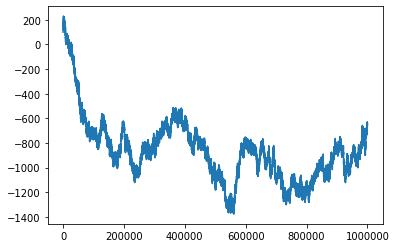

In [5]:
plot(ps);

In [6]:
dti = pd.date_range('2018-01-01', periods=num_entries, freq='15S')
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:15',
               '2018-01-01 00:00:30', '2018-01-01 00:00:45',
               '2018-01-01 00:01:00', '2018-01-01 00:01:15',
               '2018-01-01 00:01:30', '2018-01-01 00:01:45',
               '2018-01-01 00:02:00', '2018-01-01 00:02:15',
               ...
               '2018-06-23 14:37:30', '2018-06-23 14:37:45',
               '2018-06-23 14:38:00', '2018-06-23 14:38:15',
               '2018-06-23 14:38:30', '2018-06-23 14:38:45',
               '2018-06-23 14:39:00', '2018-06-23 14:39:15',
               '2018-06-23 14:39:30', '2018-06-23 14:39:45'],
              dtype='datetime64[ns]', length=1000000, freq='15S')

In [7]:
df = pd.DataFrame(data=ps, index=dti, columns=['Bid'])
df.head()

,Bid
2018-01-01 00:00:00,100.000000
2018-01-01 00:00:15,100.593080
2018-01-01 00:00:30,101.537640
2018-01-01 00:00:45,102.332359
2018-01-01 00:01:00,102.499218


In [8]:
df = df.resample('5Min', closed='left').ohlc()
df['volume'] = 100000.0
df.head()

Bid                                        volume
                           open        high         low       close          
2018-01-01 00:00:00  100.000000  104.810930  100.000000  104.810930  100000.0
2018-01-01 00:05:00  103.098919  110.401956  102.760362  109.045565  100000.0
2018-01-01 00:10:00  110.201610  114.451327  107.670766  112.949643  100000.0
2018-01-01 00:15:00  111.835202  111.835202  101.823435  102.872221  100000.0
2018-01-01 00:20:00  104.251658  109.544754  104.057053  108.654177  100000.0

In [9]:
datamatrix = df2dmat(df)

In [10]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2018-01-01 00:00:00,104.810930,104.810930,100.000000,100.000000,100000
2018-01-01 00:05:00,109.045565,110.401956,102.760362,103.098919,100000
2018-01-01 00:10:00,112.949643,114.451327,107.670766,110.201610,100000
2018-01-01 00:15:00,102.872221,111.835202,101.823435,111.835202,100000
2018-01-01 00:20:00,108.654177,109.544754,104.057053,104.251658,100000


In [11]:
len(datamatrix)

50000

In [12]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [13]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2018-01-01 00:00:00,104.810930,104.810930,100.000000,100.000000,100000
2018-01-01 00:05:00,109.045565,110.401956,102.760362,103.098919,100000
2018-01-01 00:10:00,112.949643,114.451327,107.670766,110.201610,100000
2018-01-01 00:15:00,102.872221,111.835202,101.823435,111.835202,100000
2018-01-01 00:20:00,108.654177,109.544754,104.057053,104.251658,100000


In [14]:
len(datamatrix)

50000

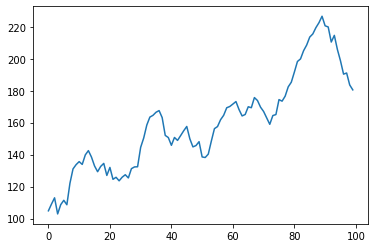

In [15]:
plot(array(datamatrix.close)[0:100]);

In [16]:
#datamatrix.dump_tsys("data.tsys")

In [17]:
dt = 0.001
x = array(datamatrix.close)

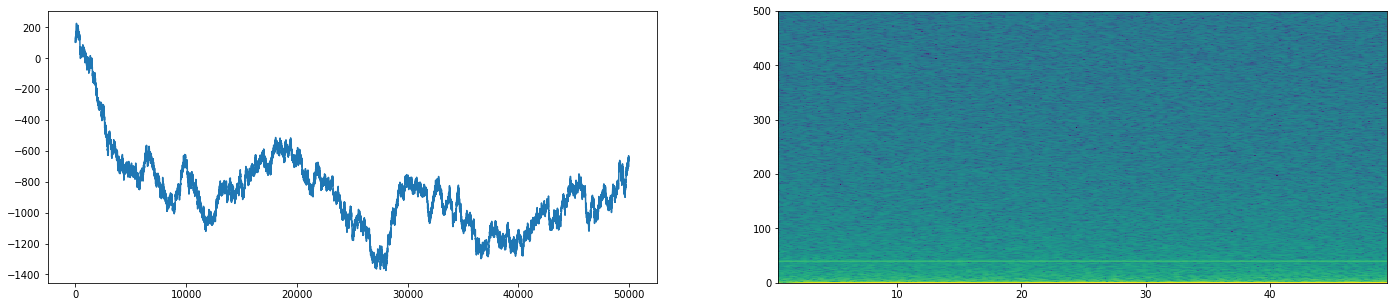

In [18]:
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24,5))
ax1.plot(x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

In [19]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.close)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.open)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [20]:
import datamodel_super as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [21]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [22]:
dmodel.data.shape

(172, 49822)

In [23]:
dmodel.data[0:10, 0:5]

array([[ 1.22407562e+00,  7.29529794e-01, -4.79543991e-01,
         1.12322574e+00, -2.19460188e-01],
       [ 1.10452256e+00,  1.40022990e+00, -6.00132463e-01,
         7.21275418e-01, -1.23232004e-01],
       [ 9.86744480e-01,  1.48620615e+00, -4.40526402e-01,
         3.04038588e-01,  3.31190296e-01],
       [ 8.88578256e-01,  1.33836230e+00,  5.62588850e-01,
        -2.91072699e-01,  8.13929132e-01],
       [-1.46376959e+00,  7.62842590e-01,  1.22156368e+00,
         9.54158276e-01,  1.13852355e+00],
       [-4.58334064e-01,  2.54326315e-01,  5.04475767e-01,
         6.35221719e-01,  9.87617201e-01],
       [ 8.55199349e-01, -4.25313651e-01, -5.53007634e-01,
        -1.14250979e-01,  1.66196611e-01],
       [ 9.95130643e-04,  1.17237663e-01,  1.47589956e-01,
        -1.72370172e-01, -2.70274033e-01],
       [-7.83604934e-03,  1.66986349e-01,  1.58425014e-01,
        -1.42744411e-01, -1.62559160e-01],
       [-9.34979930e-03,  6.05061248e-02,  2.09636550e-02,
         2.05834174e-02

In [24]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 49822)

In [25]:
tgt[:, 0:5]

array([[156.9766815 , 160.72769432, 158.23699361, 164.02041944,
        162.87237342],
       [156.9766815 , 163.48596366, 160.67468304, 164.02041944,
        163.43122655],
       [150.87804627, 157.78144005, 155.71572883, 157.11603139,
        158.64272748],
       [150.87804627, 157.78144005, 160.67468304, 159.15515384,
        163.34763235]])

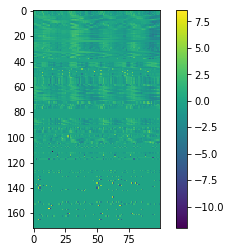

In [26]:
imshow(dmodel.data[:, 0:100]); colorbar();

In [27]:
np.save(open("data_dummy.npy",'wb'), dmodel.data)
np.save(open("data_dummy_targets.npy",'wb'), tgt)

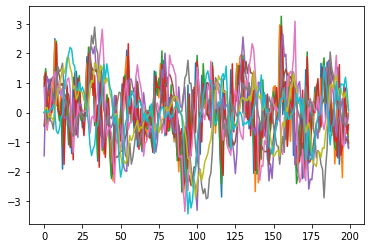

In [28]:
plot(dmodel.data.T[0:200, 0:10]);

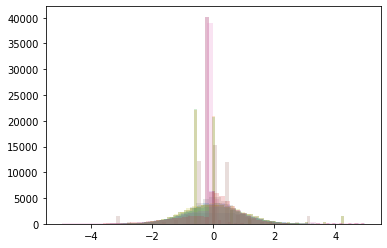

In [29]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);

In [30]:
mean(a)

0.00047175197485315785